In [11]:
!pip install handcalcs

Defaulting to user installation because normal site-packages is not writeable


In [38]:
import numpy as np
import copy
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import handcalcs.render

In [69]:
A = np.array([[5.554, 0.252, 0.496, 0.237],
[0.580, 4.953, 0.467, 0.028],
[0.319, 0.372, 8.935, 0.520],
[0.043, 0.459, 0.319, 4.778]])
A

array([[5.554, 0.252, 0.496, 0.237],
       [0.58 , 4.953, 0.467, 0.028],
       [0.319, 0.372, 8.935, 0.52 ],
       [0.043, 0.459, 0.319, 4.778]])

In [83]:
B = np.array([0.442, 0.464, 0.979, 0.126])
eps = 0.00001

In [84]:
progr_x = np.linalg.solve(np.array(A), np.array(B))
progr_x

array([0.06640598, 0.07609387, 0.10335724, 0.01156268])

In [85]:
np.allclose(np.dot(np.array(A), progr_x), np.array(B))

True

## Метод Якобі

In [86]:
A, B

(array([[5.554, 0.252, 0.496, 0.237],
        [0.58 , 4.953, 0.467, 0.028],
        [0.319, 0.372, 8.935, 0.52 ],
        [0.043, 0.459, 0.319, 4.778]]),
 array([0.442, 0.464, 0.979, 0.126]))

### Перевірка умови діагональної переваги

In [87]:
def cond0fDiagAdvantage(A):
    diag = np.diag(A)
    A = copy.deepcopy(A[~np.eye(A.shape[0],dtype=bool)].reshape(A.shape[0],-1))
    for i, j in enumerate(A):
        if sum(abs(np.array(j))) > abs(diag[i]):
            return False
    return True

In [88]:
cond0fDiagAdvantage(A)

True

### Зведення системи до вигляду x = Bx + c:

In [89]:
def reformMatr(A, B):
    diag = np.diag(A)
    A = copy.deepcopy(A[~np.eye(A.shape[0],dtype=bool)].reshape(A.shape[0],-1))
    B = copy.deepcopy(B)
    for i, j in enumerate(A):
        A[i] = np.array(j)/diag[i]
        B[i] = B[i]/diag[i]
    return A, np.array(B)

In [90]:
newA, newB = reformMatr(A, B)
newA, newB

(array([[0.0453727 , 0.08930501, 0.04267195],
        [0.11710075, 0.09428629, 0.00565314],
        [0.03570229, 0.04163402, 0.0581981 ],
        [0.00899958, 0.0960653 , 0.06676434]]),
 array([0.07958228, 0.0936806 , 0.10956911, 0.02637087]))

### Перша матрична норма (норма-cума або сума модулiв елементiв)

In [91]:
def firstMatrNorm(A):
    matrSum = np.zeros(A.shape[1])
    for i, j in enumerate(A):
         matrSum += abs(np.array(j))
    return max(matrSum)

In [92]:
firstMatrNorm(reformMatr(A, B)[0])

0.3212906193296803

### Норма Чебишова (норма-максимум або  максимум серед модулiв елементiв)

In [93]:
def chebNorm(A):
    matrSum = np.zeros(A.shape[0])
    for i, j in enumerate(A):
         matrSum[i] = sum(abs(np.array(j)))
    return max(matrSum)

In [94]:
chebNorm(reformMatr(A, B)[0])

0.21704017767009892

### Реалізація методу Якобі для розв'язання СЛАР

In [114]:
def jacobiMethod(A, B, eps):
    stopСriterion, res = [], []
    x_next, x =  np.zeros(B.shape),np.zeros(B.shape)
    checkStopСriterion = lambda x, x_next, eps: chebNorm((x_next-x).reshape(B.shape[0], 1)) < eps
    while True:
        for i, j in enumerate(A):
            x_next[i] = B[i] - np.dot(j, np.delete(x, i))
        stopСriterion.append(chebNorm((x_next-x).reshape(B.shape[0], 1)))
        print("%01.10f" % (chebNorm((x_next-x).reshape(B.shape[0], 1))))
        res.append(copy.deepcopy(x_next))
        if checkStopСriterion(x, x_next, eps): break
        x = copy.deepcopy(x_next)
    return x_next, np.array(stopСriterion), np.array(res)

In [115]:
jacobiMethod(newA, newB, eps)

0.1095691102
0.0197990880
0.0026519742
0.0005137074
0.0000867202
0.0000148216
0.0000025733


(array([0.0664063 , 0.07609425, 0.10335751, 0.01156301]),
 array([1.09569110e-01, 1.97990880e-02, 2.65197420e-03, 5.13707354e-04,
        8.67201903e-05, 1.48216052e-05, 2.57329826e-06]),
 array([[0.07958228, 0.0936806 , 0.10956911, 0.02637087],
        [0.06442137, 0.07388151, 0.10129281, 0.0093399 ],
        [0.06678557, 0.07653348, 0.10364957, 0.0119309 ],
        [0.06634421, 0.07601978, 0.10330396, 0.01149752],
        [0.06641688, 0.0761065 , 0.10336633, 0.01157391],
        [0.06640411, 0.07609168, 0.10335568, 0.01156076],
        [0.0664063 , 0.07609425, 0.10335751, 0.01156301]]))

In [118]:
changedB = np.array([5,6,9,12])#np.array([0.5,0.5,0.5,0.5])
changedB

array([ 5,  6,  9, 12])

In [119]:
jacobiMethod(newA, changedB, eps)

12.0000000000
1.5880446525
0.2991025544
0.0451402889
0.0081944266
0.0014032644
0.0002403339
0.0000415772
0.0000071508


(array([ 3.59824657,  4.75904131,  8.03473091, 10.97400617]),
 array([1.20000000e+01, 1.58804465e+00, 2.99102554e-01, 4.51402889e-02,
        8.19442655e-03, 1.40326436e-03, 2.40333855e-04, 4.15772097e-05,
        7.15078574e-06]),
 array([[ 5.        ,  6.        ,  9.        , 12.        ],
        [ 3.41195535,  4.49808197,  7.87330722, 10.77773127],
        [ 3.63287732,  4.79718452,  8.06366866, 11.01152811],
        [ 3.59232944,  4.75204424,  8.02972187, 10.96809717],
        [ 3.59926247,  4.76023866,  8.03557649, 10.97506493],
        [ 3.5980705 ,  4.7588354 ,  8.03458229, 10.97382446],
        [ 3.59827589,  4.75907573,  8.03475546, 10.97403637],
        [ 3.59824047,  4.75903415,  8.03472579, 10.97399987],
        [ 3.59824657,  4.75904131,  8.03473091, 10.97400617]]))

### Перевірка достатніх умов збіжності та розв'язання СЛАР вказаним методом
* Для матрицi A виконується умова дiагональної переваги
* $\Vert B \Vert_{\infty}$ < 1

In [31]:
def solveSystemIter(A, B, eps, func):
    if not cond0fDiagAdvantage(A):
        print("Your matrix doesn't follow the condition of diagonal advantage")
        return -1
    else: 
        newA, newB = reformMatr(A, B)
        if chebNorm(newA) >= 1:
            print("Inputs don't follow the sufficient condition of convergence")
            return -1
        else:
            return func(newA, newB, eps)

In [51]:
jacobiResults = solveSystemIter(A, B, eps, jacobiMethod)[2]
jacobiResults

array([[0.07958228, 0.0936806 , 0.10956911, 0.02637087],
       [0.06442137, 0.07388151, 0.10129281, 0.0093399 ],
       [0.06678557, 0.07653348, 0.10364957, 0.0119309 ],
       [0.06634421, 0.07601978, 0.10330396, 0.01149752],
       [0.06641688, 0.0761065 , 0.10336633, 0.01157391],
       [0.06640411, 0.07609168, 0.10335568, 0.01156076],
       [0.0664063 , 0.07609425, 0.10335751, 0.01156301]])

In [64]:
A

array([[5.554, 0.252, 0.496, 0.237],
       [0.58 , 4.953, 0.467, 0.028],
       [0.319, 0.372, 8.935, 0.52 ],
       [0.043, 0.459, 0.319, 4.778]])

In [50]:
final_x = solveSystemIter(A, B, eps, jacobiMethod)[0]
final_x

array([0.0664063 , 0.07609425, 0.10335751, 0.01156301])

In [59]:
b = np.dot(A,final_x)
b

array([0.44200209, 0.46400219, 0.97900282, 0.12600186])

In [60]:
B

[0.442, 0.464, 0.979, 0.126]

In [63]:
for i in (B - b):
    print("%01.10f" % i)

-0.0000020933
-0.0000021885
-0.0000028241
-0.0000018614


### Двосторонній характер збіжності ітераційної послідовності
Зобразимо на графіку знайдені наближення з допомогою методу Якобі та порівняємо з результатом, знайденим з допомогою функції linalg.solve

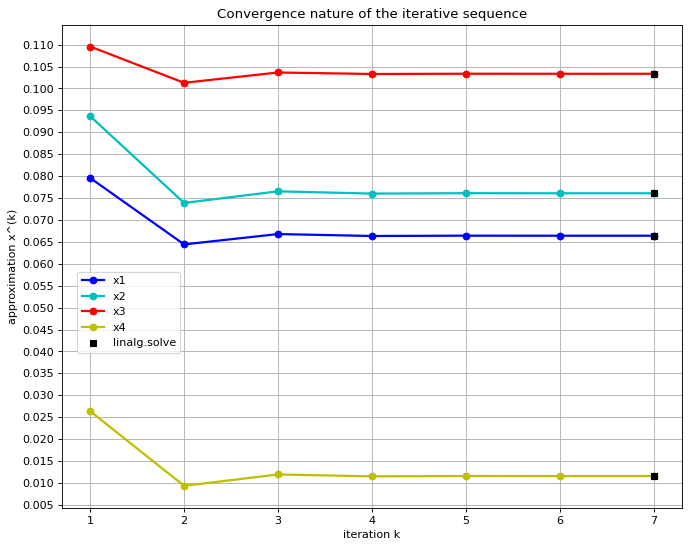

In [33]:
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.title('Сonvergence nature of the iterative sequence')
col = ['b-o', 'c-o', 'r-o', 'y-o']
plt.grid(True)
for i, j in enumerate(np.transpose(jacobiResults)):
    plt.plot([i+1 for i in range(np.transpose(jacobiResults).shape[1])], j, col[i], 
             linewidth=2, label="x"+str(i+1))
plt.yticks(np.arange(0, 0.15, 0.005))
plt.xticks(np.arange(0, 8, 1))
plt.xlabel('iteration k')
plt.ylabel('approximation x^(k)')
plt.plot( np.full((4,), 7, dtype=float), progr_x, 'ks', label="linalg.solve")
plt.legend(bbox_to_anchor=(0.2, 0.5))
plt.savefig('convergence_iter_seq.jpg', dpi = 300)
plt.show()